# Practice notebook for univariate analysis using NHANES data

This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES.  These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [3]:
da = pd.read_csv("..\..\\nhanes_2015_2016.csv")

In [4]:
da.head()
print(da.columns)
da.head(10)

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')


,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
5,83737,2.0,2.0,NaN,2,2,72,1,2.0,2.0,...,122.0,58.0,64.4,150.0,28.6,34.4,33.5,31.4,92.9,NaN
6,83741,1.0,NaN,8.0,1,1,22,4,1.0,4.0,...,112.0,74.0,76.6,165.4,28.0,38.8,38.0,34.0,86.6,NaN
7,83742,1.0,NaN,1.0,2,2,32,1,2.0,4.0,...,114.0,70.0,64.5,151.3,28.2,34.1,33.1,31.5,93.3,2.0
8,83743,NaN,NaN,NaN,2,1,18,5,1.0,NaN,...,NaN,NaN,72.4,166.1,26.2,NaN,NaN,NaN,NaN,2.0
9,83744,1.0,NaN,NaN,2,1,56,4,1.0,3.0,...,180.0,114.0,108.3,179.4,33.6,46.0,44.1,38.5,116.0,2.0


## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only, and for men only.  Then construct these three frequency tables using only people whose age is between 30 and 40.

In [7]:
da['DMDMARTL'].value_counts()
da['RIAGENDR'].value_counts()

2    2976
1    2759
Name: RIAGENDR, dtype: int64

In [8]:
da['DMDMARTLe'] = da['DMDMARTL'].replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never married",
                                      6: "Living whit partner", 77:"Refused" , 99:"Don't know"})
da['RIAGENDRe'] = da['RIAGENDR'].replace({1: "Male", 2: "Female"})

print("All people\n",da['DMDMARTLe'].value_counts(),"\n")

da_gender = da[da['RIAGENDRe']=="Female"]
print("All females\n",da_gender['DMDMARTLe'].value_counts(),"\n")

da_gender = da[da['RIAGENDRe']=="Male"]
print("All males\n",da_gender['DMDMARTLe'].value_counts(),"\n")

print("All people aged >=30 & <=40\n",da[(da['RIDAGEYR']>=30) & (da['RIDAGEYR']<=40)]['DMDMARTLe'].value_counts(),"\n")

da_gender_age = da[(da['RIAGENDRe']=="Female") & (da['RIDAGEYR']>=30) & (da['RIDAGEYR']<=40)]
print("All females aged >=30 & <=40\n",da_gender_age['DMDMARTLe'].value_counts(),"\n")

print("All males aged >=30 & <=40\n",da[(da['RIAGENDRe']=="Male") & (da['RIDAGEYR']>=30) & (da['RIDAGEYR']<=40)]['DMDMARTLe'].value_counts())


All people
 Married                2780
Never married          1004
Divorced                579
Living whit partner     527
Widowed                 396
Separated               186
Refused                   2
Name: DMDMARTLe, dtype: int64 

All females
 Married                1303
Never married           520
Divorced                350
Widowed                 296
Living whit partner     262
Separated               118
Refused                   1
Name: DMDMARTLe, dtype: int64 

All males
 Married                1477
Never married           484
Living whit partner     265
Divorced                229
Widowed                 100
Separated                68
Refused                   1
Name: DMDMARTLe, dtype: int64 

All people aged >=30 & <=40
 Married                560
Never married          217
Living whit partner    143
Divorced                70
Separated               30
Widowed                  5
Refused                  1
Name: DMDMARTLe, dtype: int64 

All females aged >=30 & <=40
 

__Q1a.__ Briefly comment on some of the differences that you observe between the distribution of marital status between women and men, for people of all ages.

__Q1b.__ Briefly comment on the differences that you observe between the distribution of marital status states for women between the overall population, and for women between the ages of 30 and 40.

__Q1c.__ Repeat part b for the men.

## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band.  Within each age band, present the distribution in terms of proportions that must sum to 1.

In [12]:
# insert your code here
da['agegrp'] = pd.cut(da['RIDAGEYR'], [10, 20, 30, 40, 50, 60, 70, 80] ) # Create age strata based on these cut points
print(da['agegrp'].value_counts(sort=False))
pd.options.display.float_format = '{:.2f}%'.format
#print(da[da['RIAGENDRe']=="Female"].groupby(['agegrp'])['DMDMARTLe'].value_counts(normalize=True))
print(da[da['RIAGENDRe']=="Female"].groupby(['agegrp'])['DMDMARTLe'].value_counts().unstack().fillna(0))



(10, 20]    340
(20, 30]    946
(30, 40]    932
(40, 50]    903
(50, 60]    924
(60, 70]    878
(70, 80]    812
Name: agegrp, dtype: int64
DMDMARTLe  Divorced  Living whit partner  Married  Never married  Refused  \
agegrp                                                                      
(10, 20]      0.00%                8.00%    1.00%         30.00%    0.00%   
(20, 30]     11.00%              106.00%  157.00%        229.00%    0.00%   
(30, 40]     43.00%               57.00%  258.00%         97.00%    0.00%   
(40, 50]     69.00%               37.00%  288.00%         63.00%    0.00%   
(50, 60]     83.00%               32.00%  257.00%         42.00%    1.00%   
(60, 70]     85.00%               19.00%  212.00%         38.00%    0.00%   
(70, 80]     59.00%                3.00%  130.00%         21.00%    0.00%   

DMDMARTLe  Separated  Widowed  
agegrp                         
(10, 20]       0.00%    0.00%  
(20, 30]      11.00%    0.00%  
(30, 40]      17.00%    2.00%  
(40, 50

__Q2a.__ Comment on the trends that you see in this series of marginal distributions.

__Q2b.__ Repeat the construction for males.

In [179]:
# insert your code here
pd.options.display.float_format = '{:.2f}%'.format
da[da['RIAGENDRe']=="Male"].groupby(['agegrp'])['DMDMARTLe'].value_counts(normalize=True)

agegrp    DMDMARTLe          
(10, 20]  Never married         0.90%
          Living whit partner   0.07%
          Married               0.03%
(20, 30]  Never married         0.52%
          Married               0.24%
          Living whit partner   0.21%
          Separated             0.02%
          Divorced              0.00%
          Widowed               0.00%
(30, 40]  Married               0.56%
          Never married         0.19%
          Living whit partner   0.16%
          Divorced              0.05%
          Separated             0.03%
          Widowed               0.00%
          Refused               0.00%
(40, 50]  Married               0.70%
          Never married         0.10%
          Divorced              0.08%
          Living whit partner   0.08%
          Separated             0.03%
          Widowed               0.00%
(50, 60]  Married               0.65%
          Divorced              0.13%
          Never married         0.10%
          Living whi

__Q2c.__ Comment on any notable differences that you see when comparing these results for females and for males.

## Question 3

Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.

<AxesSubplot:xlabel='BMXHT'>

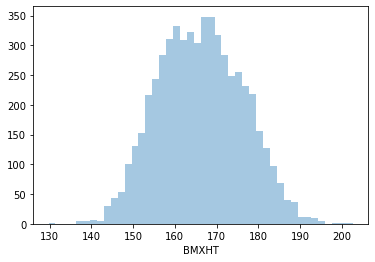

In [116]:
# insert your code here
sns.distplot(da.BMXHT.dropna(), kde=False)

__Q3a.__ Use the `bins` argument to [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) to produce histograms with different numbers of bins.  Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small. 

<AxesSubplot:xlabel='BMXHT'>

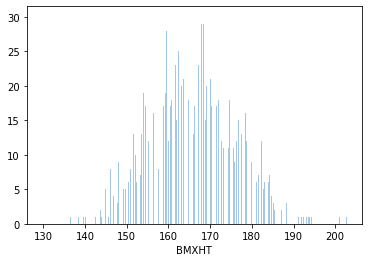

In [121]:
sns.distplot(da.BMXHT.dropna(), kde=False, bins = 2000)

__Q3b.__ Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

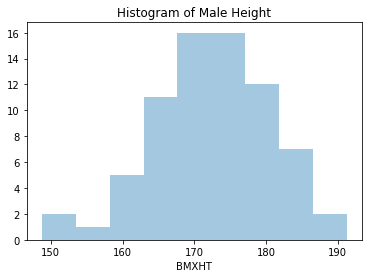

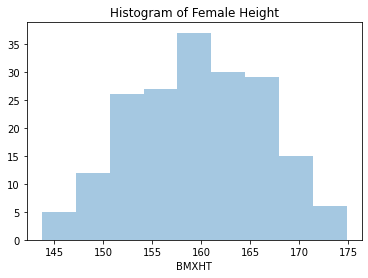

Text(0.5, 1.0, 'BoxPlot of Male and Female Height')

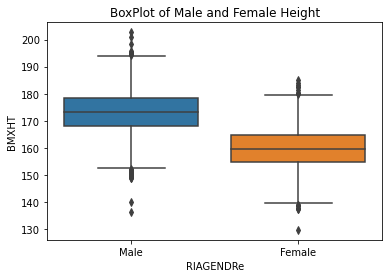

In [180]:
# insert your code here
data_gender = da[da['RIAGENDRe']=="Male"].dropna()
sns.distplot(a=data_gender['BMXHT'],  kde=False).set_title("Histogram of Male Height")
plt.show()
data_gender = da[da['RIAGENDRe']=="Female"].dropna()
sns.distplot(a=data_gender['BMXHT'],  kde=False).set_title("Histogram of Female Height")
plt.show()
sns.boxplot(x="RIAGENDRe", y="BMXHT", data=da).set_title("BoxPlot of Male and Female Height")

__Q3c.__ Comment on what features, if any are not represented clearly in the boxplots, and what features, if any, are easier to see in the boxplots than in the histograms.

## Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

<class 'pandas.core.series.Series'>


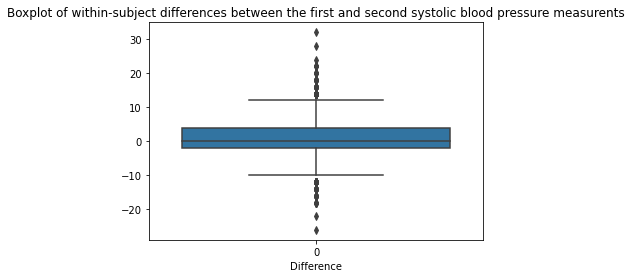

In [189]:
# insert your code here
da_diff = da['BPXSY1']-da['BPXSY2']
print(type(da_diff))
fig = sns.boxplot(data=da_diff).set_title("Boxplot of within-subject differences between the first and second systolic blood pressure measurents")
plt.xlabel("Difference")
plt.show()

__Q4a.__ What proportion of the subjects have a lower SBP on the second reading compared to the first?

In [175]:
# insert your code here
print(da['BPXSY1'].dropna().count())
print(da[da['BPXSY1']>da['BPXSY2']]['BPXSY1'].dropna().count())
print("The proportion of subjects that have a lower SBP on the second reading compared to the first is: ",\
      (da[da['BPXSY1']>da['BPXSY2']]['BPXSY1'].dropna().count()/da['BPXSY1'].dropna().count())*100,"%")

5401
2463
The proportion of subjects that have a lower SBP on the second reading compared to the first is:  45.60266617293094 %


__Q4b.__ Make side-by-side boxplots of the two systolic blood pressure variables.

Text(0.5, 1.0, 'Boxplot of the two systolic blood pressure readings')

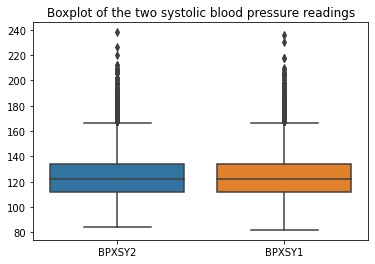

In [171]:
# insert your code here
sns.boxplot(data=da.loc[:,['BPXSY2','BPXSY1']]).set_title("Boxplot of the two systolic blood pressure readings")

__Q4c.__ Comment on the variation within either the first or second systolic blood pressure measurements, and the variation in the within-subject differences between the first and second systolic blood pressure measurements.

## Question 5

Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)).  Convert the frequencies to proportions.

In [245]:
# insert your code here
#pd.reset_option('display.float_format')
da['DMDEDUC2e'] = da['DMDEDUC2'].replace({1: "< 9th Grade", 2: "9th-11th Grade (12th no diploma)", 3: "High school graduate/GED or equivalent", 4: "Some college or AA degree", 5: "College graduate or above",
                                   7:"Refused", 9:"Don't know"})
da['DMDEDUC2e'].fillna('Missing', inplace = True)
#empty=da[pd.isnull(da['DMDHHSIZ'])]
#print(empty.shape)
da['DMDEDUC2e'].value_counts()
#da[da['RIAGENDRe']=="Female"].groupby(['agegrp'])['DMDMARTLe'].value_counts(normalize=True)
pd.set_option('display.float_format' , '{:.2f}%'.format)
da.groupby('DMDEDUC2e')['DMDHHSIZ'].value_counts(normalize = True)

DMDEDUC2e                               DMDHHSIZ
9th-11th Grade (12th no diploma)        2          0.22%
                                        3          0.16%
                                        4          0.15%
                                        5          0.15%
                                        1          0.12%
                                        6          0.11%
                                        7          0.09%
< 9th Grade                             2          0.22%
                                        5          0.15%
                                        3          0.15%
                                        4          0.13%
                                        7          0.13%
                                        1          0.11%
                                        6          0.11%
College graduate or above               2          0.35%
                                        3          0.19%
                                       

__Q5a.__ Comment on any major differences among the distributions.

__Q5b.__ Restrict the sample to people between 30 and 40 years of age.  Then calculate the median household size for women and men within each level of educational attainment.

In [241]:
# insert your code here
print(da[(da['RIDAGEYR']>=30) & (da['RIDAGEYR']<=40)].groupby('DMDEDUC2e')['DMDHHSIZ'].value_counts(),'\n')
female_age_educ_hh = da[(da['RIDAGEYR']>=30) & (da['RIDAGEYR']<=40) & (da['RIAGENDRe']=='Female')].groupby('DMDEDUC2e')['DMDHHSIZ']
male_age_educ_hh = da[(da['RIDAGEYR']>=30) & (da['RIDAGEYR']<=40) & (da['RIAGENDRe']=='Male')].groupby('DMDEDUC2e')['DMDHHSIZ']

print("Median household for the female population (30-40) grouped by educational level", female_age_educ_hh.median(),'\n')
print("Median household for the male population (30-40) grouped by educational level", male_age_educ_hh.median())

DMDEDUC2e                               DMDHHSIZ
9th-11th Grade (12th no diploma)        5           31
                                        4           26
                                        6           23
                                        2           16
                                        3           13
                                        7           10
                                        1            4
< 9th Grade                             7           24
                                        5           22
                                        6           18
                                        4           15
                                        3           12
                                        2            4
                                        1            1
College graduate or above               4           87
                                        3           71
                                        2           59
                

## Question 6

The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables [SDMVSTRA]
(https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  
Calculate the mean age ([RIDAGEYR]
                        (https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), 
                   height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and
                   BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) 
    for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), 
    within each MVU, 
 and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [1]:
# insert your code here
pd.reset_option('display.float_format')
pd.set_option('display.float_format','{:.2f}'.format)
print(da.groupby(['SDMVSTRA','SDMVPSU','RIAGENDRe'])['RIDAGEYR','BMXHT','BMXBMI'].mean(),'\n')
print(da.groupby(['SDMVSTRA','SDMVPSU','RIAGENDRe'])['RIDAGEYR','BMXHT','BMXBMI'].mean().min(),'\n')
print(da.groupby(['SDMVSTRA','SDMVPSU','RIAGENDRe'])['RIDAGEYR','BMXHT','BMXBMI'].mean().max(),'\n')
ratio = da.groupby(['SDMVSTRA','SDMVPSU','RIAGENDRe'])['RIDAGEYR','BMXHT','BMXBMI'].mean().max() / \
da.groupby(['SDMVSTRA','SDMVPSU','RIAGENDRe'])['RIDAGEYR','BMXHT','BMXBMI'].mean().min()
print(ratio)

NameError: name 'pd' is not defined

__Q6a.__ Comment on the extent to which mean age, height, and BMI vary among the MVUs.

__Q6b.__ Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU.  Report the ratio between the largest and smalles IQR across the MVUs.

In [349]:
# insert your code here
desc = da.groupby(['SDMVSTRA','SDMVPSU','RIAGENDRe'])['RIDAGEYR','BMXHT','BMXBMI'].describe()
upper_Q = desc.loc[:,[('RIDAGEYR',   '75%'),(   'BMXHT',   '75%'),(  'BMXBMI',   '75%')]]
lower_Q = desc.loc[:,[('RIDAGEYR',   '25%'),(   'BMXHT',   '25%'),(  'BMXBMI',   '25%')]]

print(type(upper_Q.values), len(upper_Q.values))
IQ_shape = (upper_Q.shape)
IQ_array = np.zeros(IQ_shape)
IQ_index = upper_Q.index

for i in range(len(upper_Q.values)):
    IQ_array[i] = upper_Q.values[i]-lower_Q.values[i]
    
IQ_df = pd.DataFrame(data=IQ_array, index=IQ_index, columns = ['RIDAGEYR', 'BMXHT', 'BMXBMI'])

print(IQ_df)

print(IQ_df.max()/IQ_df.min())


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


<class 'numpy.ndarray'> 60
                            RIDAGEYR  BMXHT  BMXBMI
SDMVSTRA SDMVPSU RIAGENDRe                         
119      1       Female        31.25   9.32    9.75
                 Male          29.75   9.00    5.35
         2       Female        33.50   9.95    9.35
                 Male          29.00  11.22    5.30
120      1       Female        26.50   8.75    8.78
                 Male          23.75  12.13    9.40
         2       Female        25.75  10.55    7.75
                 Male          26.00  10.50    7.10
121      1       Female        26.25   9.15    9.00
                 Male          34.50  10.72    7.50
         2       Female        26.00   9.60    8.10
                 Male          25.50   8.60    5.70
122      1       Female        24.00  10.40    9.88
                 Male          29.50   9.40    7.70
         2       Female        25.00   7.57    8.48
                 Male          30.00  10.15    4.10
123      1       Female        30.50 

__Q6c.__ Comment on the extent to which the IQR for age, height, and BMI vary among the MVUs.